In [168]:
import pandas
import matplotlib.pyplot as plt
import pickle
import wntr
import wntr.metrics.economic as economics
from testWN import testWN as twm
import numpy as np
import pandas as pd

In [169]:
%matplotlib notebook

# Water Network

In [170]:
#inp_file = '../Networks/BWCNdata/c-town_true_network.inp'
inp_file = 'c-town_true_network_simplified_controls.inp'

ctown = twm(inp_file)

Get network information:

In [171]:
## nodes = ctown.getNodeName()
links = ctown.getLinkName()
link_df = pd.DataFrame(ctown.wn.links.todict())
pump_df = pd.DataFrame(np.ones(len(links[0])).reshape(1,-1), columns=links[0])
valves_df = pd.DataFrame(np.ones(len(links[2])).reshape(1,-1), columns=links[2])

In [172]:
pump_df.keys()

Index(['PU2', 'PU5', 'PU6', 'PU8', 'PU10'], dtype='object')

<IPython.core.display.Javascript object>


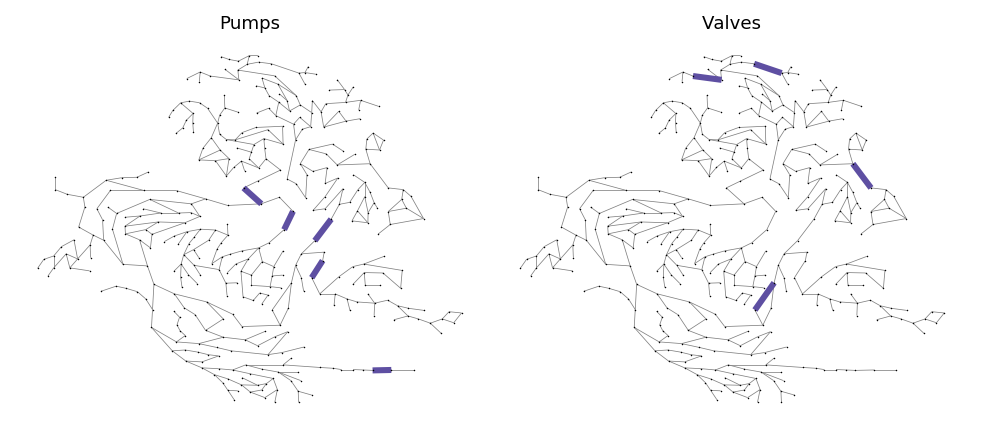

In [173]:
fig_nw, ax_nw = plt.subplots(1,2, figsize=(9,4))
wntr.graphics.plot_network(ctown.wn, link_attribute=pump_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Pumps', ax=ax_nw[0], link_labels=False,node_labels=False)
wntr.graphics.plot_network(ctown.wn, link_attribute=valves_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Valves', ax=ax_nw[1])
fig_nw.tight_layout()

# Results

In [174]:
file = '/home/ffiedler/tubCloud/Shared/WDN_SurrogateModels/_RESULTS/150sim/results_sim_15_try.pkl'
with open(file, 'rb') as f:
    results=pickle.load(f)

In [175]:
results.link.keys()

dict_keys(['linkquality', 'flowrate', 'headloss', 'velocity', 'status', 'setting', 'frictionfact', 'rxnrate'])

In [176]:
results.link['flowrate'].shape

(673, 428)

## Links

<IPython.core.display.Javascript object>


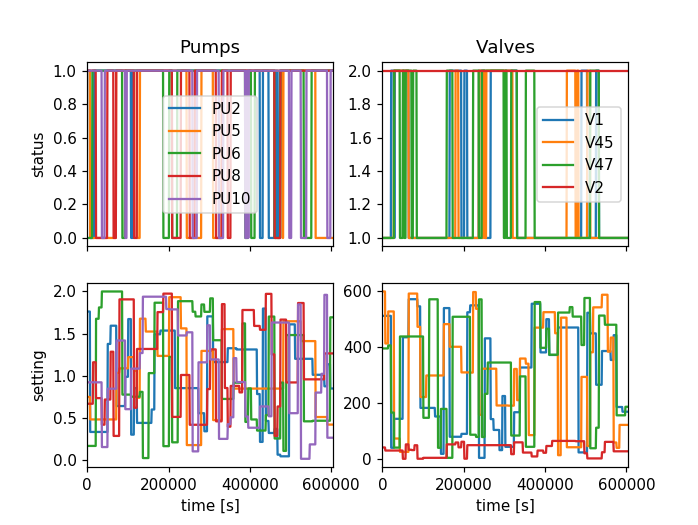

Text(0.5, 0, 'time [s]')

In [177]:
fig, ax = plt.subplots(2,2, sharex = True)
# link[0] -> list with all pump names
results.link['status'][links[0]].plot(ax=ax[0,0], title='Pumps')
results.link['setting'][links[0]].plot(ax=ax[1,0], legend=False)
# link[2] -> list with all valve names
results.link['status'][links[2]].plot(ax=ax[0,1], title='Valves')
results.link['setting'][links[2]].plot(ax=ax[1,1], legend=False)

ax[0,0].set_ylabel('status')
ax[1,0].set_ylabel('setting')

ax[1,0].set_xlabel('time [s]')
ax[1,1].set_xlabel('time [s]')

#ax[1,1].set_ylim(top=50)

### Pumps

<IPython.core.display.Javascript object>


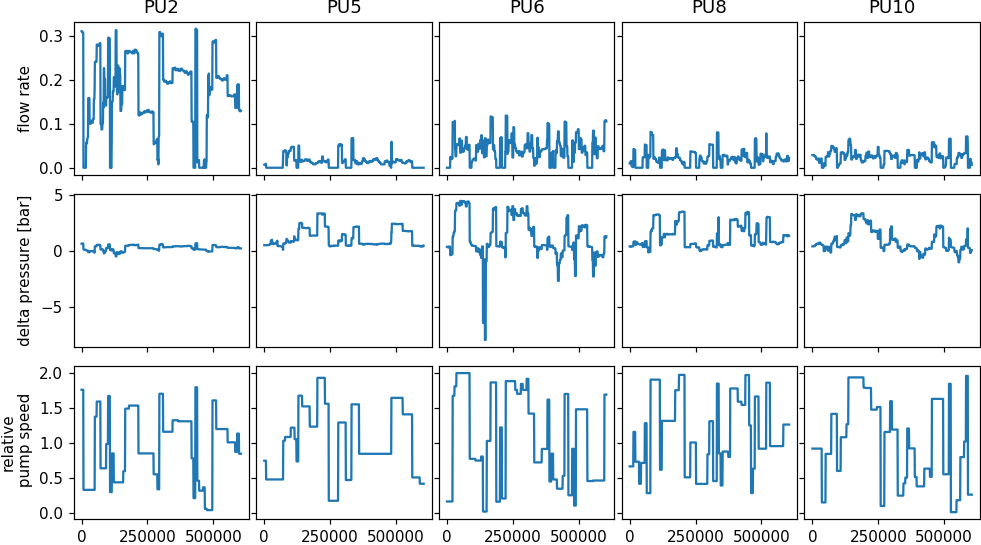

In [178]:
fig_4, ax_4 = plt.subplots(3,5, sharex=True, sharey='row', figsize=(9,5))
for i,pump_i in enumerate(links[0]):
    v_i = results.link['flowrate'][pump_i]
    dp_i = (results.node['pressure'][link_df[pump_i]['end_node'].name]
            -results.node['pressure'][link_df[pump_i]['start_node'].name])*1000
    ax_4[0,i].plot(v_i)
    ax_4[1,i].plot(dp_i/1e5)
    ax_4[2,i].plot(results.link['setting'][pump_i])
    ax_4[0,i].set_title(pump_i)
    
ax_4[0,0].set_ylabel('flow rate')
ax_4[1,0].set_ylabel('delta pressure [bar]')
ax_4[2,0].set_ylabel('relative\n pump speed')

fig_4.align_labels()
fig_4.tight_layout(pad=0, w_pad=0, h_pad=0)

### Valves

In [145]:
fig_4, ax_4 = plt.subplots(3,4, sharex=True, sharey='row', figsize=(9,5))
for i,valve_i in enumerate(links[2]):
    v_i = results.link['flowrate'][valve_i]
    dp_i = (results.node['pressure'][link_df[valve_i]['end_node'].name]
            -results.node['pressure'][link_df[valve_i]['start_node'].name])*1000
    ax_4[0,i].plot(v_i)
    ax_4[1,i].plot(dp_i/1e5)
    ax_4[2,i].plot(results.link['flowrate'].index,results.setting[valve_i])
    ax_4[0,i].set_title(valve_i)
    
ax_4[0,0].set_ylabel('flow rate')
ax_4[1,0].set_ylabel('delta pressure [bar]')
ax_4[2,0].set_ylabel('valve setting')

fig_4.align_labels()
fig_4.tight_layout(pad=0.5, w_pad=0, h_pad=0)

<IPython.core.display.Javascript object>

# Energy of pumps

In [135]:
energy = economics.pump_energy(results.link['flowrate'], results.node['head'], ctown.wn)

<IPython.core.display.Javascript object>


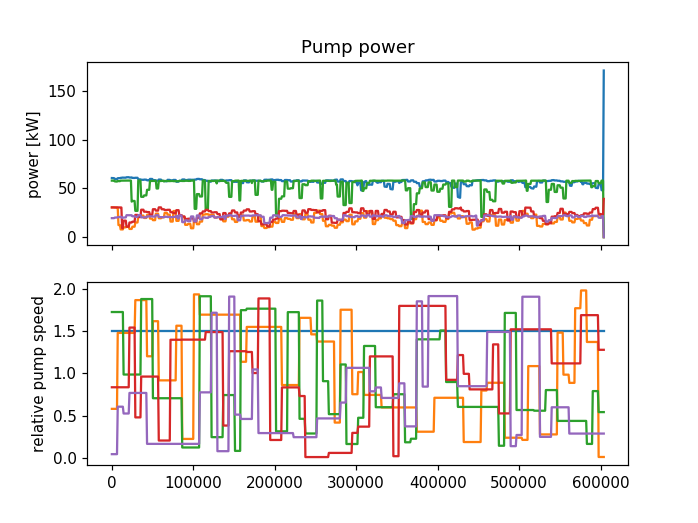

Text(0, 0.5, 'relative pump speed')

In [153]:
linkNames = ctown.getLinkName()
energyToPlot = energy[linkNames[0]] # Pumps
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(energyToPlot/1000)
ax[0].set_ylabel('power [kW]')
ax[0].set_title('Pump power')
ax[1].plot(results.link['flowrate'].index,results.setting[links[0]])
ax[1].set_ylabel('relative pump speed')